# **Taller 7 - Análisis de Figuras Geométricas: Centroide, Área y Perímetro**

## Objetivo del taller

Detectar formas simples (círculos, cuadrados, triángulos) en imágenes binarizadas y calcular propiedades geométricas como área, perímetro y centroide. El objetivo es desarrollar habilidades para extraer métricas
relevantes de contornos detectados en imágenes procesadas.


# 1. Preparar el entorno de dibujo

In [1]:
# Importar librerías necesarias para creación y visualización de imágenes
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imageio
from IPython.display import Image, display

# Definir tamaño del lienzo
width, height = 500, 500
img = np.zeros((height, width), dtype=np.uint8)

# Guardar frames del proceso paso a paso para el gif
frames = []

2. Mostrar el lienzo en blanco

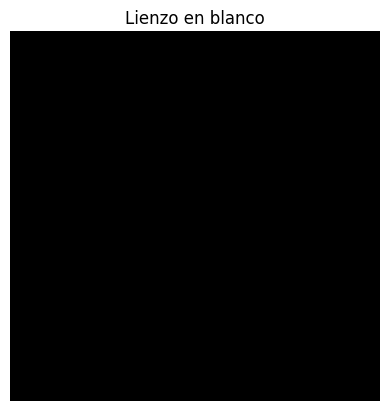

In [2]:
# 2. Mostrar lienzo en blanco
frame = cv2.cvtColor(img.copy(), cv2.COLOR_GRAY2BGR)
frames.append(frame)
plt.imshow(frame[..., ::-1])
plt.title("Lienzo en blanco")
plt.axis("off")
plt.show()

#3. Dibujar figuras básicas (cuadrado, círculo con OpenCV, triángulo con drawContours)


## 3.1 Cuadrado

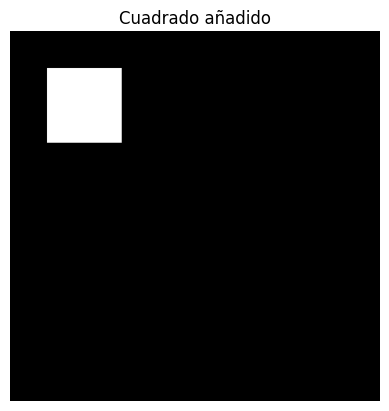

In [3]:
# Cuadrado
cv2.rectangle(img, (50, 50), (150, 150), 255, -1)
frame = cv2.cvtColor(img.copy(), cv2.COLOR_GRAY2BGR)
frames.append(frame)
plt.imshow(frame[..., ::-1])
plt.title("Cuadrado añadido")
plt.axis("off")
plt.show()

## 3.2 Círculo con OpenCV

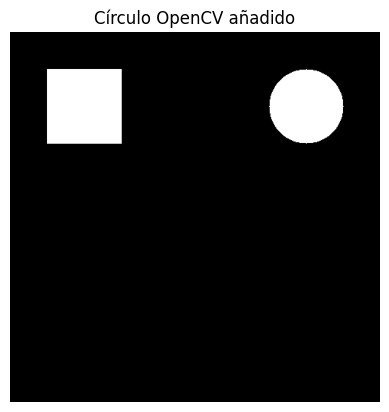

In [4]:
# Círculo con OpenCV
cv2.circle(img, (400, 100), 50, 255, -1)
frame = cv2.cvtColor(img.copy(), cv2.COLOR_GRAY2BGR)
frames.append(frame)
plt.imshow(frame[..., ::-1])
plt.title("Círculo OpenCV añadido")
plt.axis("off")
plt.show()

## 3.3 Triangulo

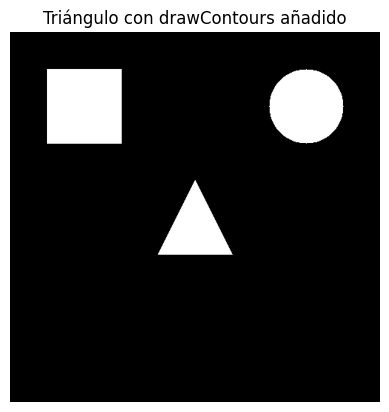

In [5]:
# Triángulo clásico
pts = np.array([[200, 300], [250, 200], [300, 300]], np.int32)
cv2.drawContours(img, [pts], 0, 255, -1)
frame = cv2.cvtColor(img.copy(), cv2.COLOR_GRAY2BGR)
frames.append(frame)
plt.imshow(frame[..., ::-1])
plt.title("Triángulo con drawContours añadido")
plt.axis("off")
plt.show()

# 4. Dibujar un hexágono manualmente

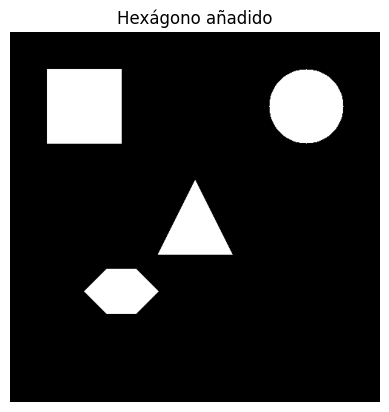

In [6]:
# 4. Dibujar un hexágono manualmente
hex_pts = np.array([
    [100, 350],
    [130, 320],
    [170, 320],
    [200, 350],
    [170, 380],
    [130, 380]
], np.int32)
cv2.drawContours(img, [hex_pts], 0, 255, -1)
frame = cv2.cvtColor(img.copy(), cv2.COLOR_GRAY2BGR)
frames.append(frame)
plt.imshow(frame[..., ::-1])
plt.title("Hexágono añadido")
plt.axis("off")
plt.show()

# 5. Círculo - algoritmo de punto medio

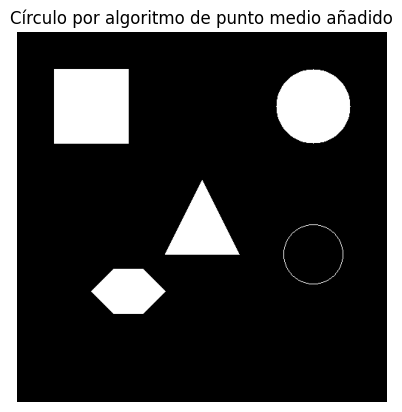

In [7]:
# 5. Círculo con algoritmo de punto medio

def midpoint_circle(x0, y0, radius):
    x = radius
    y = 0
    p = 1 - radius
    while x >= y:
        for dx, dy in [(x, y), (y, x), (-x, y), (-y, x), (-x, -y), (-y, -x), (x, -y), (y, -x)]:
            if 0 <= x0 + dx < width and 0 <= y0 + dy < height:
                img[y0 + dy, x0 + dx] = 255
        y += 1
        if p <= 0:
            p += 2 * y + 1
        else:
            x -= 1
            p += 2 * y - 2 * x + 1



# Algoritmo de punto medio para dibujar círculos
def midpoint_circle(x0, y0, radius):
    x = radius
    y = 0
    p = 1 - radius  # condición inicial de la decisión

    while x >= y:

        # Dibujar puntos simétricos del círculo (8 octantes)
        for dx, dy in [(x, y), (y, x), (-x, y), (-y, x), (-x, -y), (-y, -x), (x, -y), (y, -x)]:
            # Validar que el punto esté dentro del lienzo
            if 0 <= x0 + dx < width and 0 <= y0 + dy < height:
                img[y0 + dy, x0 + dx] = (255)        #añadirlo
        y += 1
        # Actualizar parámetro de decisión
        if p <= 0:
            p = p + 2*y + 1
        else:
            x -= 1
            p = p + 2*y - 2*x + 1



midpoint_circle(400, 300, 40)
frame = cv2.cvtColor(img.copy(), cv2.COLOR_GRAY2BGR)
frames.append(frame)
plt.imshow(frame[..., ::-1])
plt.title("Círculo por algoritmo de punto medio añadido")
plt.axis("off")
plt.show()


# 6. Triángulo por rasterización (scanline)

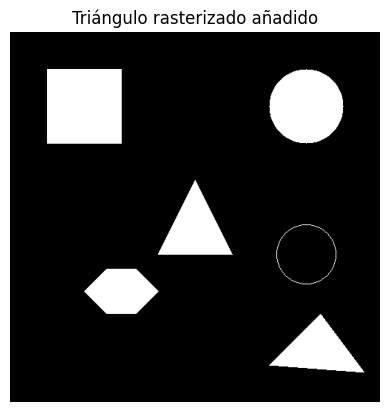

In [8]:
# 6. Triángulo por rasterización (scanline)


# Algoritmo de rasterización de triángulo por scanline

def fill_triangle(p1, p2, p3):


    # Ordenar puntos por coordenada Y (de arriba a abajo)
    pts = sorted([p1, p2, p3], key=lambda p: p[1])
    (x1, y1), (x2, y2), (x3, y3) = pts

    # Función para interpolar valores X a lo largo de un segmento vertical
    def interpolate(y0, y1, x0, x1):
        if y1 - y0 == 0: return []  # evitar división por cero
        return [int(x0 + (x1 - x0) * (y - y0) / (y1 - y0)) for y in range(y0, y1)]

    # Interpolaciones para cada segmento del triángulo
    x12 = interpolate(y1, y2, x1, x2)
    x23 = interpolate(y2, y3, x2, x3)
    x13 = interpolate(y1, y3, x1, x3)

    # Concatenar para tener los extremos del lado izquierdo
    x_left = x12 + x23

    # Rellenar línea por línea (scanline)
    for y, xl, xr in zip(range(y1, y3), x13, x_left):
        for x in range(min(xl, xr), max(xl, xr)):
            if 0 <= x < width and 0 <= y < height:
                img[y, x] = 255



fill_triangle((350, 450), (420, 380), (480, 460))
frame = cv2.cvtColor(img.copy(), cv2.COLOR_GRAY2BGR)
frames.append(frame)
plt.imshow(frame[..., ::-1])
plt.title("Triángulo rasterizado añadido")
plt.axis("off")
plt.show()

[Figura 1] Tipo: Triángulo, Área: 4731.50, Perímetro: 331.75, Centroide: (415,429)
[Figura 2] Tipo: Hexágono, Área: 4200.00, Perímetro: 249.71, Centroide: (150,350)
[Figura 3] Tipo: Círculo, Área: 5030.00, Perímetro: 266.11, Centroide: (400,300)
[Figura 4] Tipo: Triángulo, Área: 5000.00, Perímetro: 341.42, Centroide: (249,266)
[Figura 5] Tipo: Círculo, Área: 7704.00, Perímetro: 329.71, Centroide: (400,100)
[Figura 6] Tipo: Cuadrado, Área: 10000.00, Perímetro: 400.00, Centroide: (100,100)


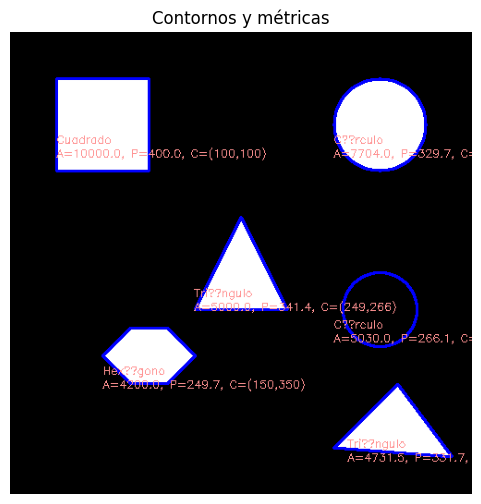

In [9]:
# 7. Detección de contornos

contornos, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Crear una copia en color de la imagen para dibujar los resultados
output_img = cv2.cvtColor(img.copy(), cv2.COLOR_GRAY2BGR)

# Recorrer cada contorno detectado
for i, cnt in enumerate(contornos):
    # Calcular el área del contorno
    area = cv2.contourArea(cnt)

    # Calcular el perímetro del contorno
    perim = cv2.arcLength(cnt, True)

    # Calcular los momentos geométricos para encontrar el centroide.
    M = cv2.moments(cnt)
    cx = int(M["m10"] / M["m00"]) if M["m00"] != 0 else 0
    cy = int(M["m01"] / M["m00"]) if M["m00"] != 0 else 0

    # Aproximar el contorno
    approxContor = cv2.approxPolyDP(cnt, 0.04 * perim, True)

    # Clasificar la figura según la cantidad de vértices aproximados
    shape = "Círculo"  # Asumimos "círculo" por defecto
    if len(approxContor) == 3:
        shape = "Triángulo"
    elif len(approxContor) == 4:
        shape = "Cuadrado"
    elif 5 <= len(approxContor) < 6:
        shape = "Otro"
    elif 6 == len(approxContor):
        shape = "Hexágono"
    else:
        shape #Aca asume circulo.




    #Imprimir información en consola
    print(f"[Figura {i+1}] Tipo: {shape}, Área: {area:.2f}, Perímetro: {perim:.2f}, Centroide: ({cx},{cy})")

    # Dibujar el contorno
    cv2.drawContours(output_img, [cnt], -1, (255, 0, 0), 2)

    # Preparar el texto con la clasificación y métricas
    text = f"{shape}\nA={area:.1f}, P={perim:.1f}, C=({cx},{cy})"

    # Mostrar el texto en la imagen
    for j, line in enumerate(text.split('\n')):
        cv2.putText(output_img, line, (cx - 50, cy + 20 + 15 * j),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.4, (146, 146, 255), 1)

    # Guardar este frame para el GIF
    frame = output_img.copy()
    frames.append(frame)




# Mostrar imagen final con todas las métricas
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB))
plt.title("Contornos y métricas")
plt.axis("off")
plt.show()

# 8. Crear y mostrar GIF

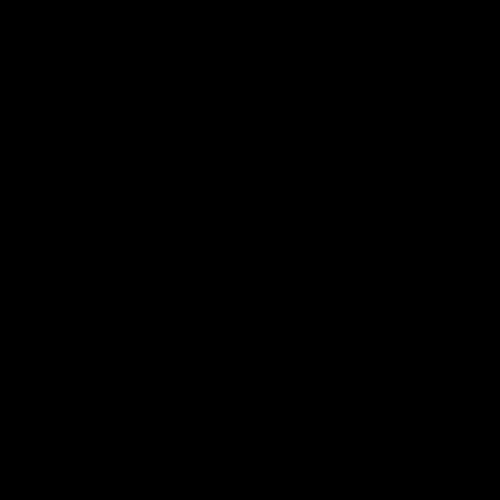

In [11]:
# 8. Crear y mostrar GIF
gif_frames = [cv2.cvtColor(f, cv2.COLOR_BGR2RGB) for f in frames]
gif_path = "taller_analisis_figuras_geometricas.gif"
imageio.mimsave(gif_path, gif_frames, fps=1)

# Mostrar el GIF
display(Image(filename=gif_path))